In [27]:
import numpy as np
import matplotlib.pyplot as plt
from inference.gp import GpRegressor
from inference.gp import SquaredExponential, WhiteNoise

Gather the data

In [28]:
data = np.genfromtxt("data/step_results.csv", delimiter=",", names=True)

Train the GP model

In [29]:
training_points = [(tau, eta) for tau, eta in zip(data["tau_bzs"], data["eta_TES"])]
composite_kernel = SquaredExponential() + WhiteNoise()
GP_startup_inv = GpRegressor(training_points, data["I_stkg"], kernel=composite_kernel)
GP_tbr = GpRegressor(training_points, data["TBR"], kernel=composite_kernel)
# @Samuele, what kernel did you use in Matlab?

Sample space for plotting

In [30]:
N_tau = 100
N_eta = 100
tau_refined = np.linspace(0, data["tau_bzs"].max(), num=N_tau)
eta_TES_refined = np.linspace(0, data["eta_TES"].max(), num=N_eta)
XX, YY = np.meshgrid(tau_refined, eta_TES_refined)
grid = XX, YY

gp_coords = np.append(grid[0].reshape(-1,1), grid[1].reshape(-1,1),axis=1)

mean_startup_inv, stdev_startup_inv = GP_startup_inv(gp_coords)
mean_tbr, stdev_tbr = GP_tbr(gp_coords)

Plot

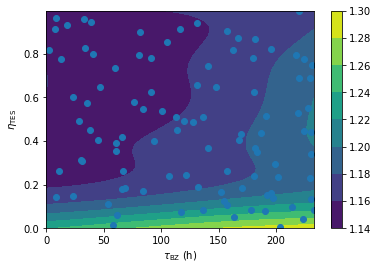

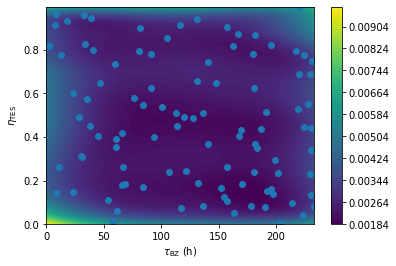

In [33]:
CF = plt.contourf(XX/3600, YY, mean_tbr.reshape([N_tau, N_eta]), levels=8)

plt.scatter(data["tau_bzs"]/3600, data["eta_TES"])
plt.colorbar(CF)
plt.xlabel(r"$\tau_\mathrm{BZ}$ (h)")
plt.ylabel(r"$\eta_\mathrm{TES}$")

plt.figure()

CF = plt.contourf(XX/3600, YY, stdev_tbr.reshape([N_tau, N_eta]), levels=100)

plt.scatter(data["tau_bzs"]/3600, data["eta_TES"])
plt.colorbar(CF)
plt.xlabel(r"$\tau_\mathrm{BZ}$ (h)")
plt.ylabel(r"$\eta_\mathrm{TES}$")
plt.show()
